In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
import sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score

#Importing sklearn modules
from sklearn.metrics import mean_squared_error,confusion_matrix, precision_score, recall_score, auc,roc_curve
from sklearn import ensemble, linear_model, neighbors, svm, tree, neural_network
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn import svm, model_selection, tree, neighbors, ensemble, discriminant_analysis, gaussian_process
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [174]:
df = pd.read_csv('D:\AUST CSE 4.1\cse4108 Artificial Intelligence lab\AI Lab\HeartDisease.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [175]:
df.shape

(303, 14)

In [176]:
# Checking for missing values.
df.isnull().values.any()

False

In [177]:
# Checking for imbalanced data based on outcome.
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

<Axes: xlabel='target', ylabel='count'>

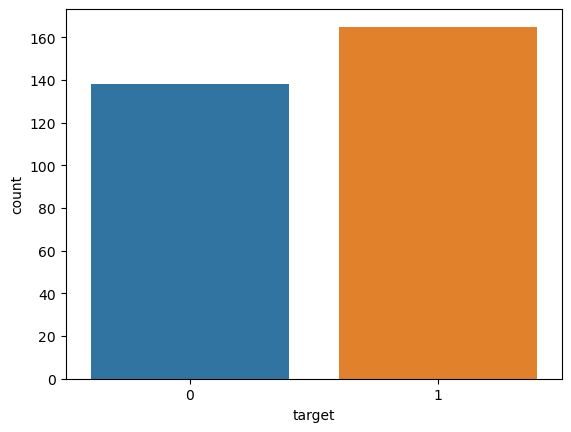

In [178]:
sns.countplot(x='target', data=df)

K-Nearest Neighbours

In [179]:
# Splitting the dataset into training and testing sets.
x = df.iloc[:, :-2]
y = df.iloc[:, -1]
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 100, test_size = 0.2)
# Using standard scaler as a standardization technique.
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)
# Looking for optimal number of nearest neighbours.
import math
math.sqrt(len(y_test))

7.810249675906654

In [193]:
# Creating KNN Model.
KNeighborsClassifier(metric='euclidean', n_neighbors=9)
classifier = KNeighborsClassifier(n_neighbors = 9, p = 2, metric = 'euclidean')
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)
#Generating confusion matrix
cm = confusion_matrix(y_test,y_pred)
y_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0], dtype=int64)

All result for K-Nearest Neighbour classifier:
Testing Accuracy : 0.8852459016393442
Testing Precision: 0.8484848484848485
Testing Recall   : 0.9333333333333333
Testing F1-Score : 0.888888888888889


<Axes: >

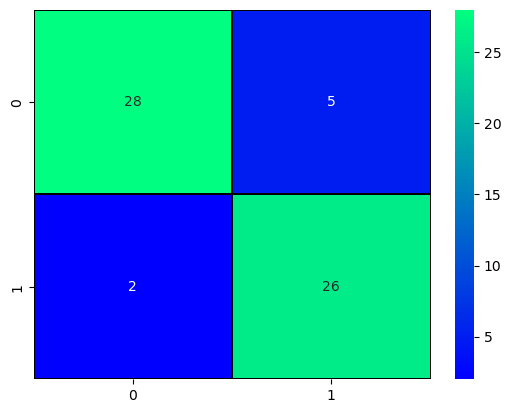

In [181]:
print('All result for K-Nearest Neighbour classifier:')
TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]
print('Testing Accuracy :',(TP+TN)/(TP+TN+FN+FP))
print('Testing Precision:',(TP/(TP+FP)))
print('Testing Recall   :',(TP/(TP+FN)))
print('Testing F1-Score :',2*( ((TP/(TP+FP))*(TP/(TP+FN))) / ((TP/(TP+FP))+(TP/(TP+FN))) ) )
sns.heatmap(cm, annot=True,cmap='winter',linewidths=0.2, linecolor='black',annot_kws={"size": 10})

In [182]:
from sklearn.model_selection import cross_val_score
#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=7)
#train model with cv of 5 
cv_scores = cross_val_score(knn_cv, x, y, cv=5)
#print each cv score (accuracy) and average them
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

[0.60655738 0.63934426 0.60655738 0.75       0.6       ]
cv_scores mean:0.6404918032786886


#Decision tree 

In [196]:
tree_model = DecisionTreeClassifier(max_depth=5,criterion='entropy')
cv_scores = cross_val_score(tree_model, x, y, cv=10, scoring='accuracy')
m=tree_model.fit(x, y)
prediction=m.predict(x_test)
#Generating confusion matrix
cm= confusion_matrix(y_test,prediction)
prediction

array([1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0], dtype=int64)

All result for Decision Tree classifier:
Testing Accuracy : 0.5901639344262295
Testing Precision: 0.6363636363636364
Testing Recall   : 0.6176470588235294
Testing F1-Score : 0.6268656716417911


<Axes: >

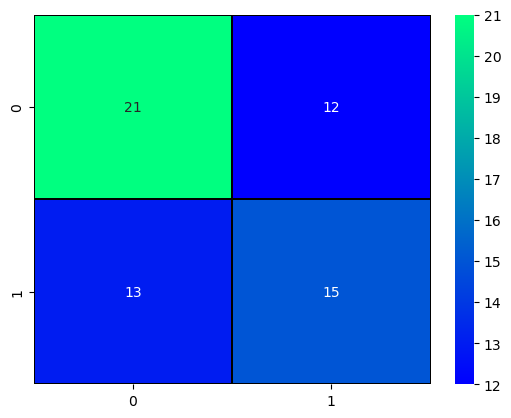

In [184]:
print('All result for Decision Tree classifier:')

TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]
print('Testing Accuracy :',(TP+TN)/(TP+TN+FN+FP))
print('Testing Precision:',(TP/(TP+FP)))
print('Testing Recall   :',(TP/(TP+FN)))
print('Testing F1-Score :',2*( ((TP/(TP+FP))*(TP/(TP+FN))) / ((TP/(TP+FP))+(TP/(TP+FN))) ) )
sns.heatmap(cm, annot=True,cmap='winter',linewidths=0.2, linecolor='black',annot_kws={"size": 10})

In [185]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
max_depth = [1,2,3,4,5]

for val in max_depth:
    score = cross_val_score(tree.DecisionTreeClassifier(max_depth= val, random_state= 42), x, y, cv= kf, scoring="accuracy")
    print(f'Average score({val}): {"{:.3f}".format(score.mean())}')

Average score(1): 0.729
Average score(2): 0.723
Average score(3): 0.802
Average score(4): 0.779
Average score(5): 0.719


In [186]:
# Application of all Machine Learning methods
MLA = [
    #Trees    
    tree.DecisionTreeClassifier(),
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    ]

In [187]:
MLA_columns = []
MLA_compare = pd.DataFrame(columns = MLA_columns)


row_index = 0
for alg in MLA:
    
    
    predicted = alg.fit(x_train, y_train).predict(x_test)
    fp, tp, th = roc_curve(y_test, predicted)
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index,'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Train Accuracy'] = round(alg.score(x_train, y_train), 4)
    MLA_compare.loc[row_index, 'MLA Test Accuracy'] = round(alg.score(x_test, y_test), 4)
    MLA_compare.loc[row_index, 'MLA Precission'] = precision_score(y_test, predicted)
    MLA_compare.loc[row_index, 'MLA Recall'] = recall_score(y_test, predicted)

    row_index+=1
    
MLA_compare.sort_values(by = ['MLA Test Accuracy'], ascending = False, inplace = True)    
MLA_compare

,MLA Name,MLA Train Accuracy,MLA Test Accuracy,MLA Precission,MLA Recall
1,KNeighborsClassifier,0.8719,0.8852,0.83871,0.928571
0,DecisionTreeClassifier,1.0000,0.7541,0.69697,0.821429


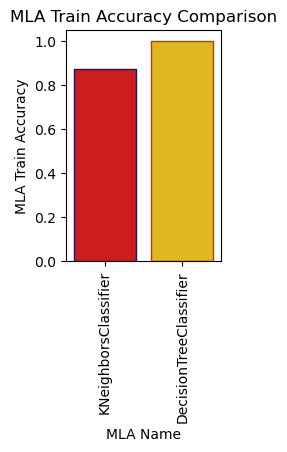

In [208]:
plt.subplots(figsize=(2,3))
sns.barplot(x="MLA Name", y="MLA Train Accuracy",data=MLA_compare,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('MLA Train Accuracy Comparison')
plt.show()

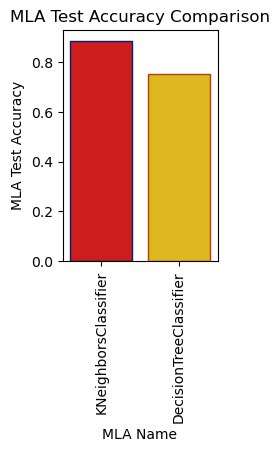

In [209]:
plt.subplots(figsize=(2,3))
sns.barplot(x="MLA Name", y="MLA Test Accuracy",data=MLA_compare,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('MLA Test Accuracy Comparison')
plt.show()

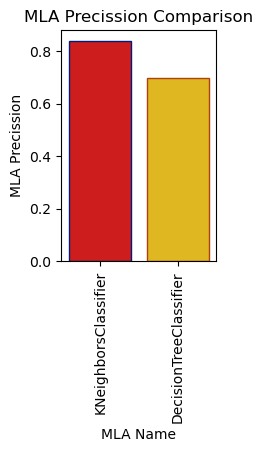

In [210]:
plt.subplots(figsize=(2,3))
sns.barplot(x="MLA Name", y="MLA Precission",data=MLA_compare,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('MLA Precission Comparison')
plt.show()

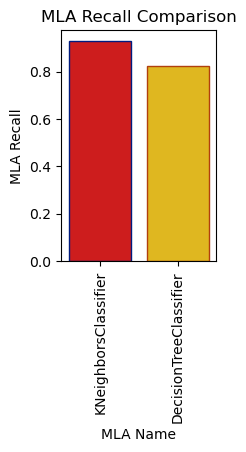

In [211]:
plt.subplots(figsize=(2,3))
sns.barplot(x="MLA Name", y="MLA Recall",data=MLA_compare,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('MLA Recall Comparison')
plt.show()